##Diabetes Prediction
Machine learning as a tool for early diabetes detection: By delving into complex medical data, machine learning algorithms might empower us to identify individuals at risk of developing diabetes before it's too late.

##About Project


1. Using data to predict diabetes: This project aims to develop a tool that can analyze various medical factors like age, blood sugar, and BMI to determine if someone is likely to have diabetes.

2. Uncovering patterns in medical data: We're building a model to automatically classify individuals as having diabetes or not based on information like blood pressure, weight, and family history.

3. Machine learning for diabetes diagnosis: This project explores whether analyzing data points such as glucose levels and body mass index can help predict the presence of diabetes.

4. Classifying diabetes risk: Our goal is to create a system that uses medical information like age and insulin levels to assess an individual's risk of developing diabetes.

5. Predicting diabetes with medical data: This project investigates the potential of using factors like blood pressure and family history to identify individuals at risk of diabetes through a machine learning model.


##About Dataset
*  The dataset includes various health factors like the number of pregnancies, blood sugar levels after a glucose test, and family history, to predict the presence of diabetes (0 meaning no diabetes, 1 meaning diabetes).

*   We're looking at features like past pregnancies, blood pressure, and body mass index, along with genetic factors, to see if they can help identify individuals with diabetes (labeled as 0 or 1).

1. Pregnancies : Number of times woman has been pregnant
2. Glucose : Plasma Glucose Concentration of two hours in an oral glucose
3. Blood Pressure : Diastollic Blood Pressure (in mmhg)
4. Skin Thickness Triceps Skin Fold Thickness (in mm)
5. Insulin : two hour serum insulin (mu U/ml)
6. Body Mass Index : in (weight in kg/height in m)^2
7. Age : (Years)
8. Diabetes Pedigree Function : Scores likelihood of diabetes based on family history
9. Outcome : 1 (has diabetes) and 0 (does not has diabetes)

#1.Importing Libraries

In [ ]:
import pandas as pd #processing data to read csv
import numpy as np #calculation library
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns #used for visualizing data
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix #import to visualize outliers
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

#2.Loading Datasets

Understand the informations about data set (generally)

In [ ]:
df_diabetes=pd.read_csv("/content/drive/MyDrive/Diabetes Pima/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_diabetes.shape

(768, 9)

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Summary Information (Percentile each features):
* Count = Number of nom-empty rows
* Mean = Mean value of feature
* std = Standard deviation of value
* min = minimum value
* max = maximum value

When observing the data, we noticed some minimum values (like zero blood pressure) that are medically impossible. We'll replace them with either the median or mean, depending on the data distribution for each column. Additionally, we have to handle outliers with extremely high insulin levels. These outliers need special attention during analysis.

#NG Data (['Pregnancies','Glucose','BloodPressure',	'SkinThickness',	'Insulin	']

#3.Dropping duplicate, null, and zero values

In [ ]:
df_diabetes.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
if df_diabetes.empty:
  print("DataFrame is empty")
else:
  duplicated_diabetes=df_diabetes.duplicated()
  print(duplicated_diabetes)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [ ]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
zero_counts = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].eq(0).sum()

print(f"Number of zero values in each column:\n{zero_counts}")


Number of zero values in each column:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64


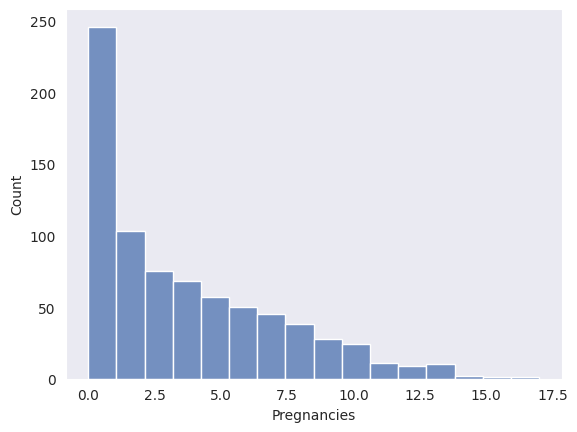

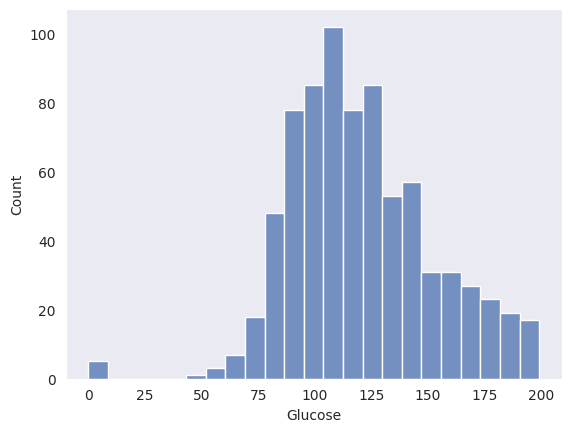

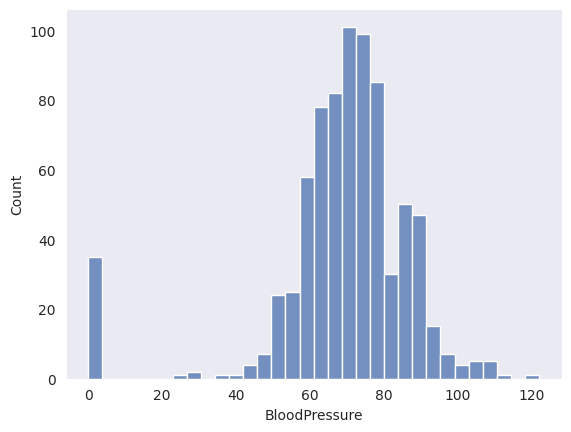

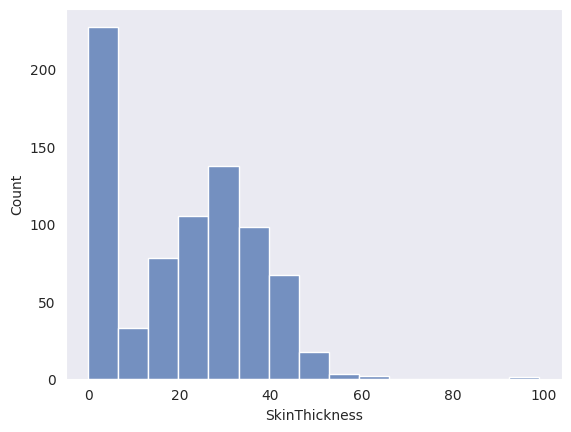

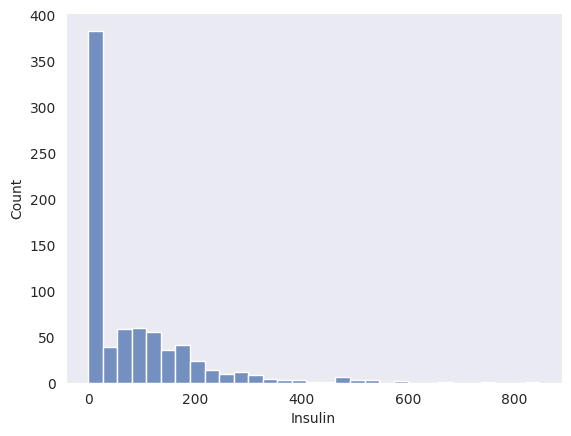

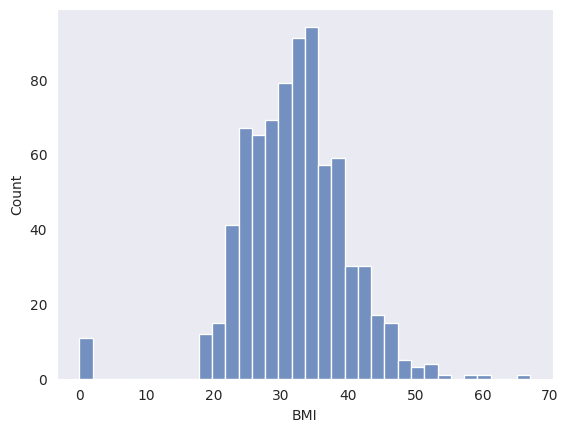

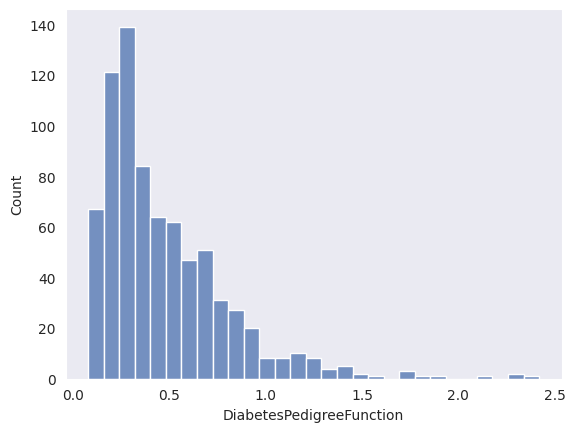

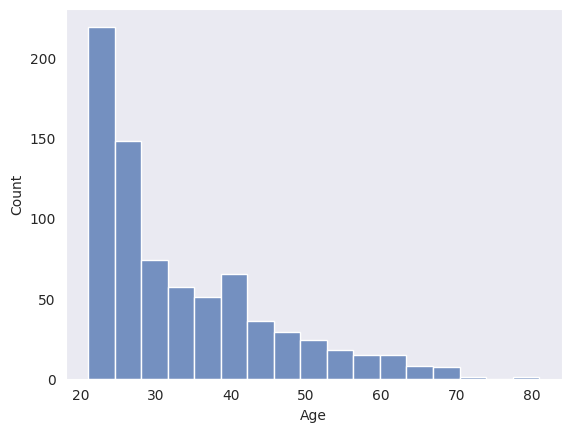

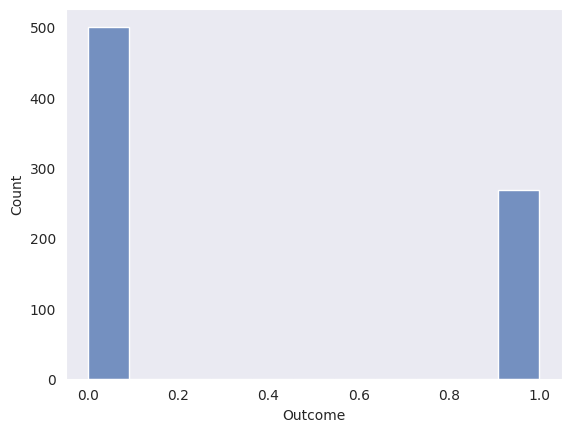

In [ ]:
# Loop through the desired columns
desired_columns =df_diabetes
for col in desired_columns:
    sns.histplot(data=df_diabetes, x=col)  # Basic histogram

    # Apply customizations as needed
    # Example: Set number of bins and title
    # sns.histplot(data=df_diabetes, x=col, bins=10, title=f"Histogram of {col}")

    # Show the plot
    plt.show()


Analysis of 5 columns revealed the presence of zero values. However, further investigation determined that these values are valid for certain columns: Age and DiabetesPedigreeFunction cannot be zero by definition, and observations of zero pregnancies were confirmed through descriptive statistics analysis (df.describe). Therefore, replacement of zero values is not necessary for these columns.

##Analysis of 5 columns identified the presence of zero values.
* Several columns exhibit skewed distributions, making the median a more robust choice for imputing zero values compared to the mean, which is susceptible to outlier influence. This choice aligns with the observed normality of Glucose and Blood Pressure, where mean imputation is suitable. Conversely, SkinThickness, Insulin, and BMI display skewness, favoring the less outlier-sensitive median for imputation.

##4.Replacing Zero Values Using Median :

In [ ]:
df_diabetes['BMI']=df_diabetes['BMI'].replace(0,df_diabetes['BMI'].median())#impute using median for skewed distribution
df_diabetes['Insulin']=df_diabetes['Insulin'].replace(0,df_diabetes['Insulin'].median())#impute using median for skewed distribution
df_diabetes['SkinThickness']=df_diabetes['SkinThickness'].replace(0,df_diabetes['SkinThickness'].median())#impute using median for skewed distribution
df_diabetes['Glucose']=df_diabetes['Glucose'].replace(0,df_diabetes['Glucose'].mean())#impute using mean for normal distribution
df_diabetes['BloodPressure']=df_diabetes['BloodPressure'].replace(0,df_diabetes['BloodPressure'].mean())#impute using mean for normal distribution

In [ ]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      27.334635   94.652344   
std       3.369578   30.436016      12.115932       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

##5.Visualize Data

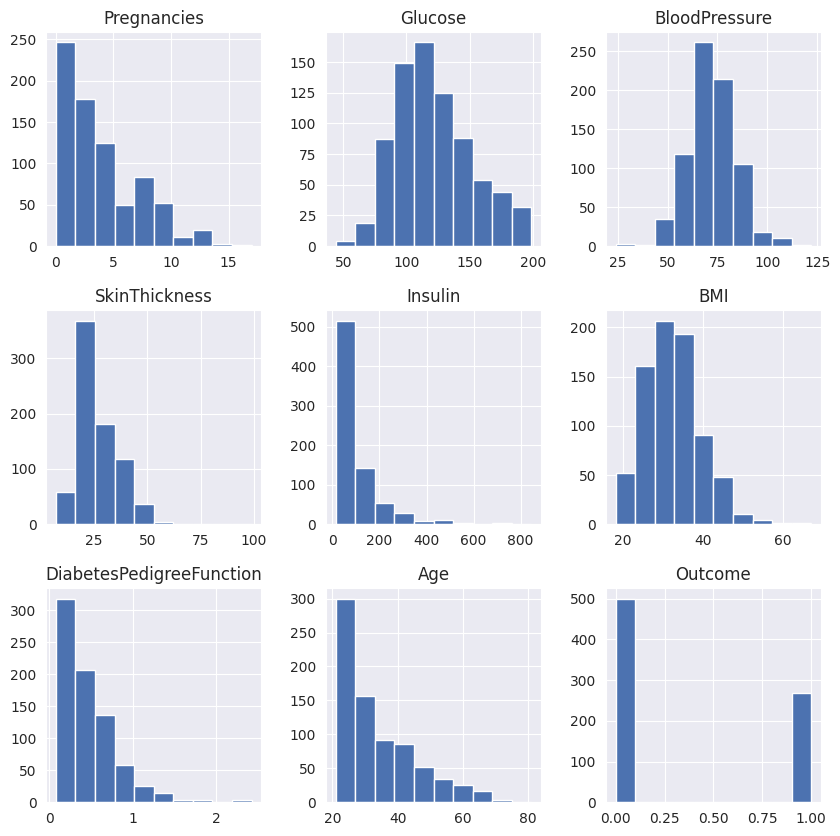

In [ ]:
df_diabetes.hist(bins=10,figsize=(10,10),)
plt.show()

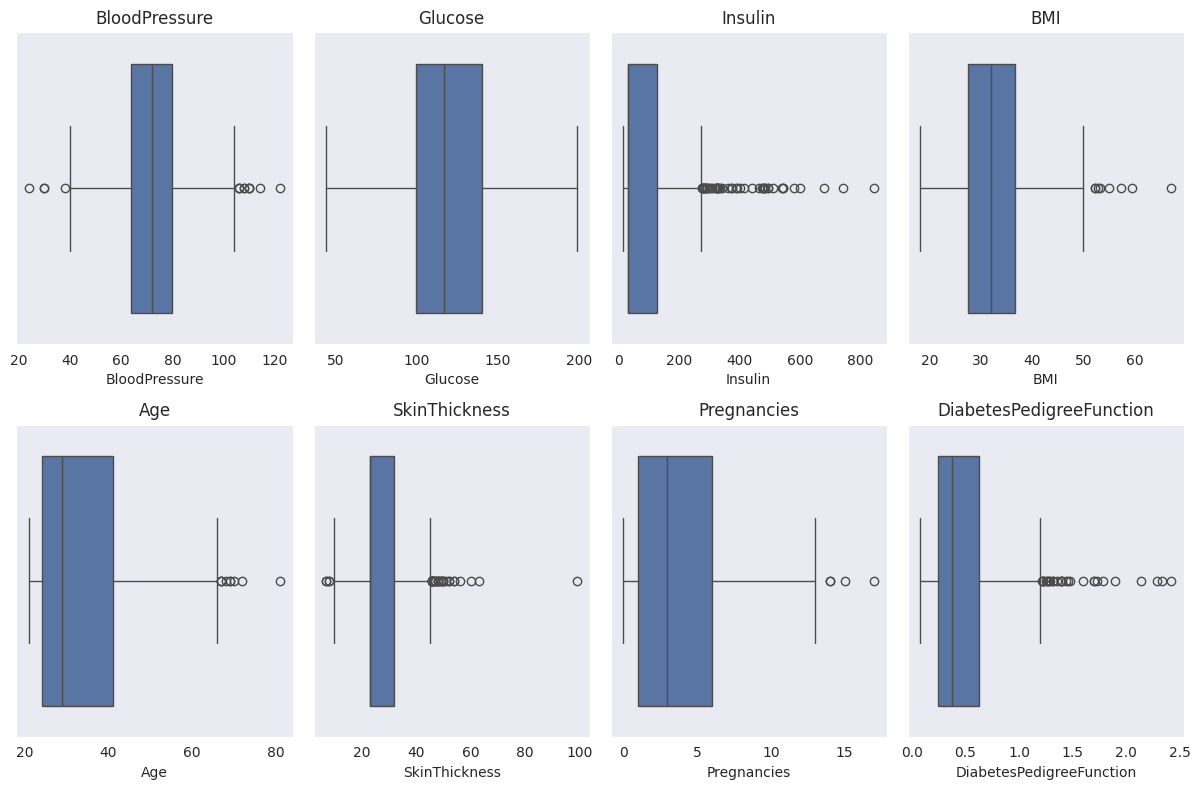

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_diabetes' holds your data

# Set custom figure size and style
plt.figure(figsize=(12, 8))  # Adjust size if needed

# Loop to create boxplots for each feature
features = ['BloodPressure', 'Glucose', 'Insulin', 'BMI', 'Age', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']
rows, cols = 2, 4  # Adjust rows and columns for layout

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # Use subplot indexing
    sns.boxplot(x=col, data=df_diabetes)
    plt.title(col)  # Add informative titles

# Adjust layout and spacing
plt.tight_layout()  # Prevent overlapping elements

# Optional customization: Rotate x-axis labels for readability
# plt.xticks(rotation=45)  # Uncomment if labels overlap

plt.show()


Analyzing the data's distribution and pinpointing outliers is crucial for accurate statistical analysis. Outliers, being unusual values, can skew results and invalidate assumptions underlying statistical tests. While removing them might seem tempting, it leads to data loss. Therefore, we'll resort to alternative techniques like scaling and transforming the data to handle outliers without discarding valuable information.

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

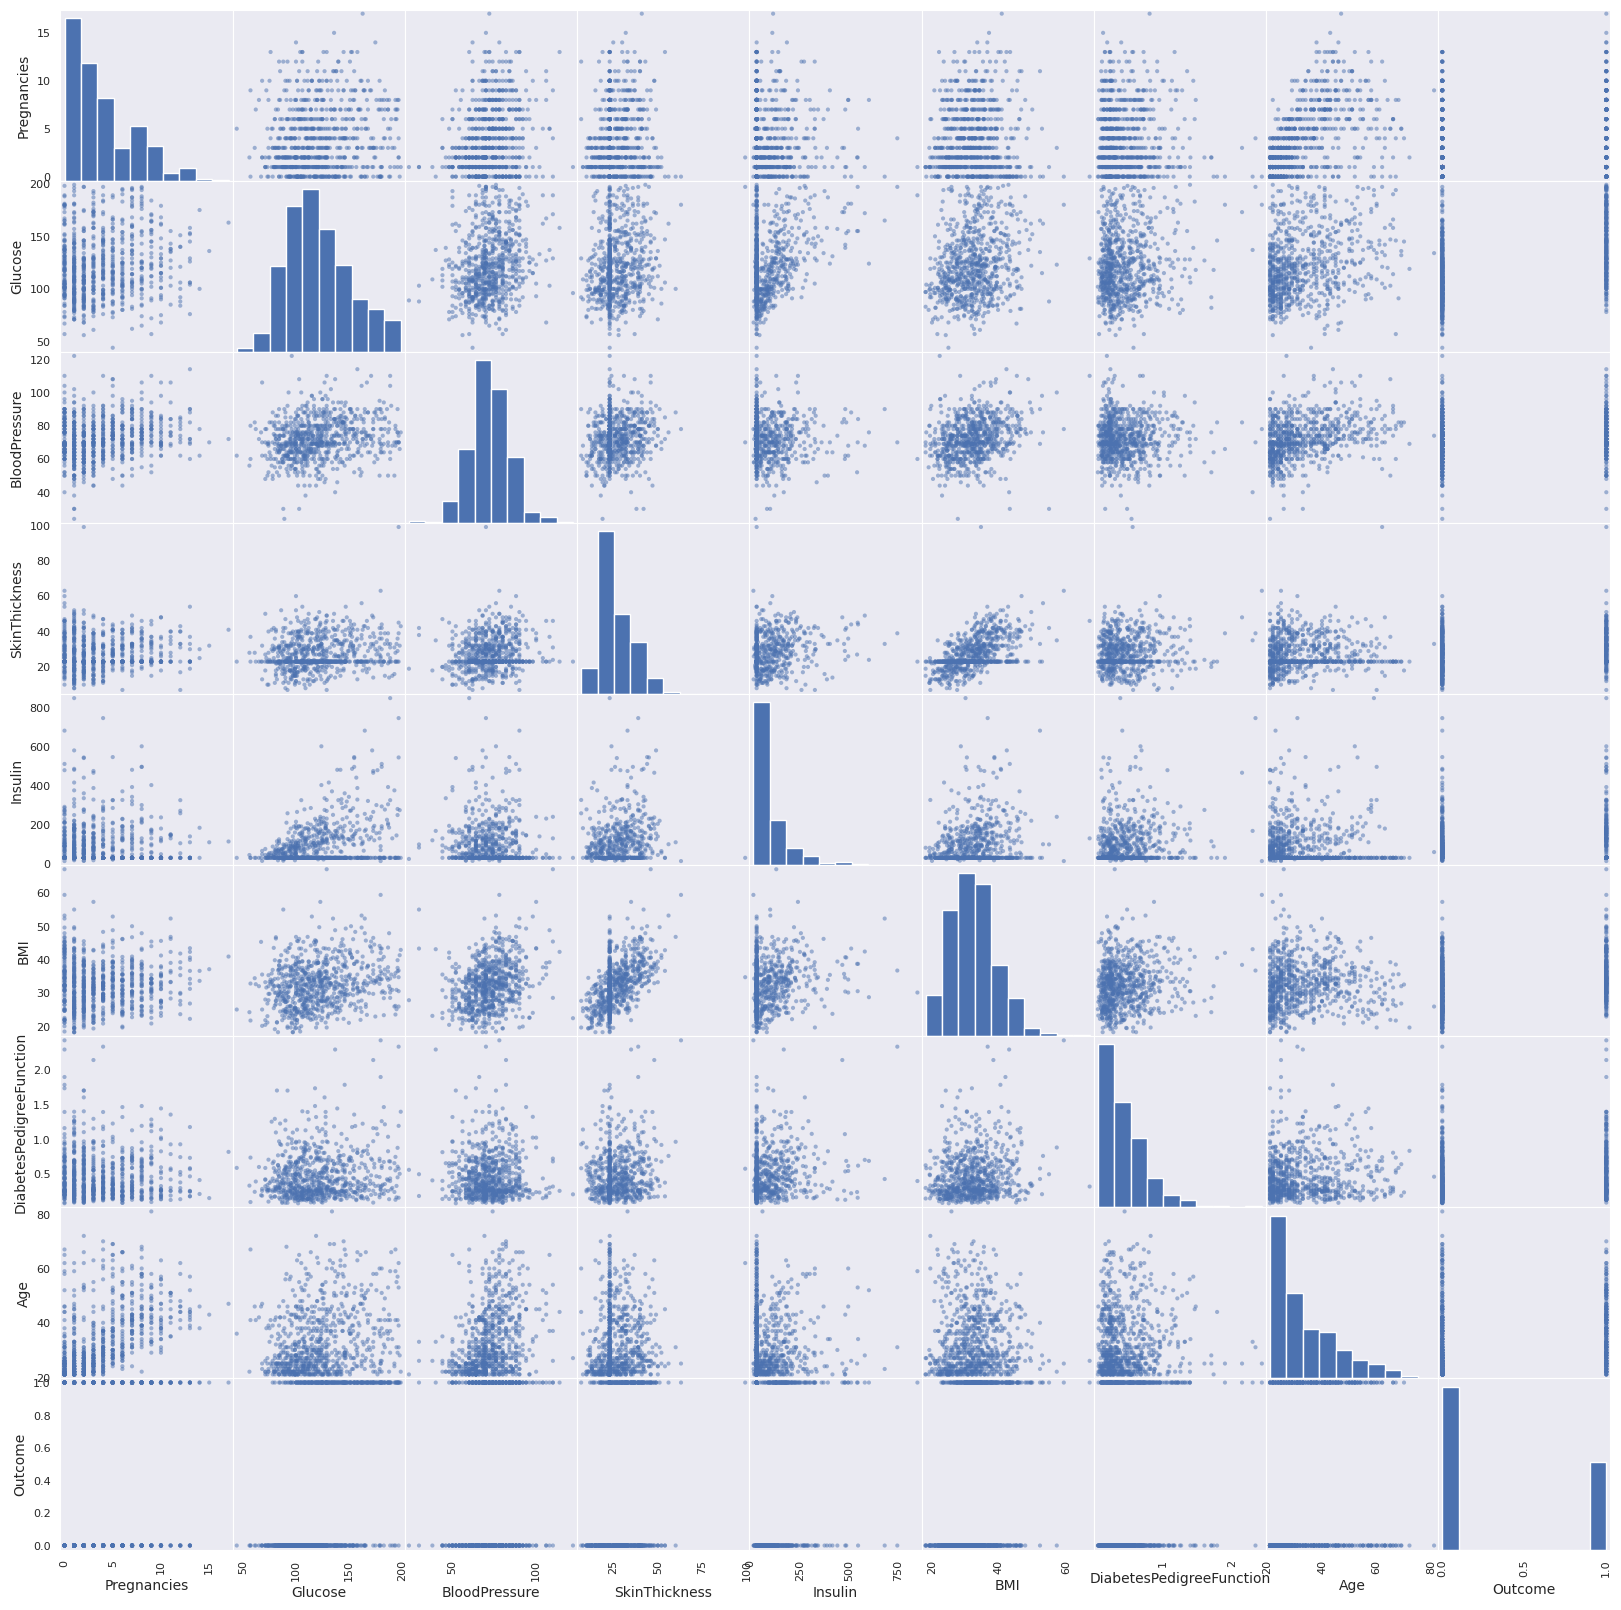

In [ ]:
from pandas.plotting import scatter_matrix
sns.set_style(style='dark')
sns.set_palette('deep')
scatter_matrix(df_diabetes,figsize=(20,20))

Visualizing relationships between variables using techniques like these plots allows us to draw conclusions about their interactions. For instance, the plot of pregnancies versus insulin reveals a potential inverse relationship, suggesting that women with higher pregnancy counts may have lower insulin levels.

<Axes: >

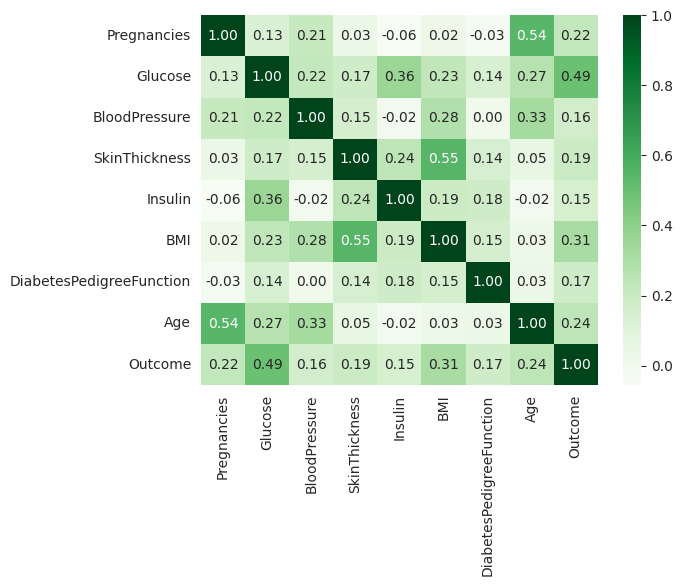

In [ ]:
corr_diabetes=df_diabetes.corr()
sns.heatmap(corr_diabetes,annot=True,cmap='Greens',fmt=".2f")

Heatmap used for find Correlation Coefficient quantifies the linear association between two variables. Ranging from -1 (perfectly negative) to +1 (perfectly positive), it measures the strength of this relationship. A value of 0 indicates no linear association.

Heat maps represent data visually using color intensity. Analyzing the correlations in the "Outcome" row, we can understand that Glucose, BMI, and Age exhibit the strongest correlations. Conversely, Blood Pressure, Insulin, and DiabetesPedigreeFunction show minimal correlations, suggesting they may not contribute significantly to the model and could be considered for removal.

In [ ]:
df_diabetes_drop=df_diabetes.drop(['BloodPressure','DiabetesPedigreeFunction','Insulin'],axis='columns')

##6.Balancing

<Axes: xlabel='Outcome', ylabel='count'>

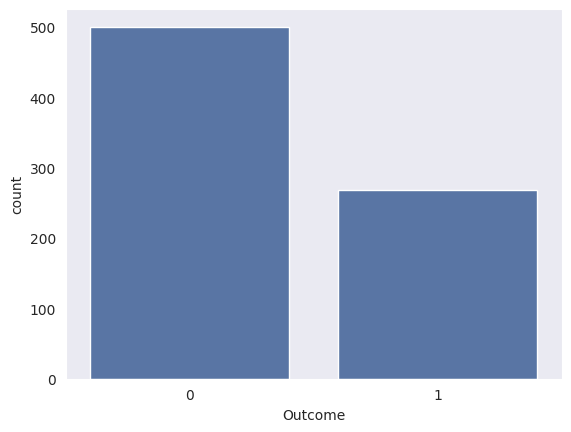

In [ ]:
sns.countplot(x='Outcome',data=df_diabetes)

In [ ]:
#changing the zeros to nulls
df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Initialize the imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the null values
imputed_df = pd.DataFrame(imputer.fit_transform(df_diabetes), columns=df_diabetes.columns)

In [ ]:
class_counts = imputed_df['Outcome'].value_counts()

# Identify the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Determine the number of instances to delete from the majority class
num_instances_to_delete = class_counts[majority_class] - class_counts[minority_class]

# Randomly select instances from the majority class to delete
majority_indices = imputed_df[imputed_df['Outcome'] == majority_class].index
delete_indices = np.random.choice(majority_indices, size=num_instances_to_delete, replace=False)

# Remove the selected instances from the dataset
balanced_df = imputed_df.drop(delete_indices)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(balanced_df['Outcome'].value_counts())

Class distribution after balancing:
1.0    268
0.0    268
Name: Outcome, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

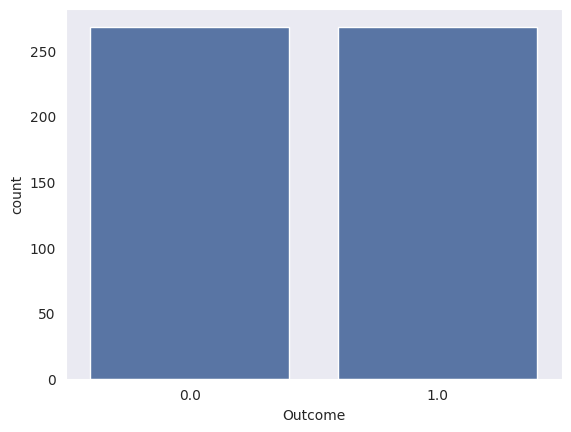

In [ ]:
sns.countplot(x='Outcome',data=balanced_df)

The number of samples in the majority class is significantly higher than those in the minority class, hindering model performance. Therefore, I employ undersampling by randomly removing majority class samples until a desired balance is achieved.

In [ ]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the columns of the DataFrame
scaled_diabetes = scaler.fit_transform(balanced_df)

# Create a new DataFrame with the scaled data
scaled_diabetes = pd.DataFrame(scaled_diabetes, columns=balanced_df.columns)

<Axes: >

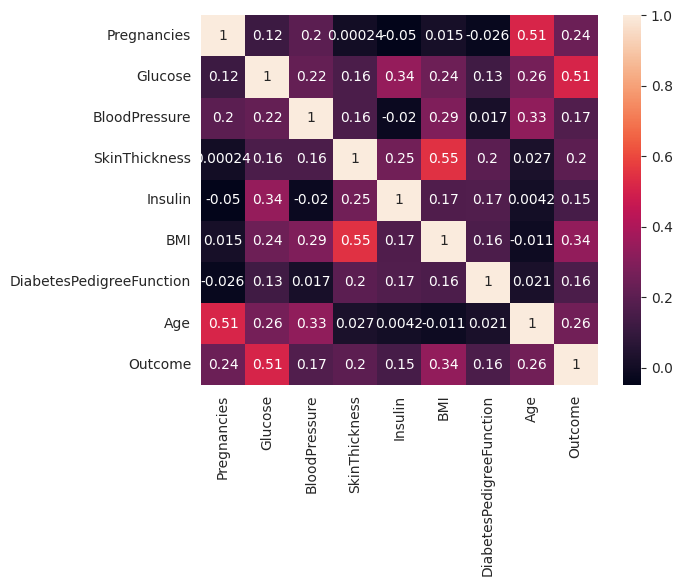

In [ ]:
corrmat=scaled_diabetes.corr()
sns.heatmap(corrmat, annot=True)

##7.Split Data Frame

In [ ]:
x = scaled_diabetes.drop('Outcome', axis=1)
y = scaled_diabetes['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_test.shape,y_test.shape

((108, 8), (108,))

##Logistic Regression

In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
lr_pred=reg.predict(x_test)

Classification Report :               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82        94
         1.0       0.80      0.81      0.80        83

    accuracy                           0.81       177
   macro avg       0.81      0.81      0.81       177
weighted avg       0.81      0.81      0.81       177

Accuracy: 0.8135593220338984
Precision: 0.7976190476190477
Recall: 0.8072289156626506
F1: 0.8023952095808383
Total Value Log Regression: 8.052006237241086 /10


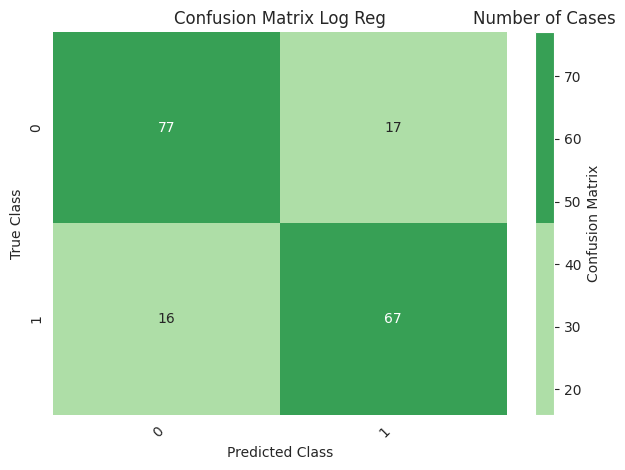

In [ ]:
print("Classification Report :",classification_report(y_test,lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:",precision_score(y_test,lr_pred))
print("Recall:",recall_score(y_test,lr_pred))
print("F1:",f1_score(y_test,lr_pred))
total_lr=(accuracy_score(y_test, lr_pred)+precision_score(y_test,lr_pred)+recall_score(y_test,lr_pred)+f1_score(y_test,lr_pred))/0.4
print("Total Value Log Regression:",total_lr,'/10')

cm = confusion_matrix(y_test, lr_pred)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction
acc_log=accuracy_score(y_test, lr_pred)
# Calculate confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Log Reg')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Decision Tree Method (20% Data for Train : 80% Data for Test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [5, 10, 20,25],
    "min_samples_leaf": [10, 20, 50],
    "criterion": ["gini", "entropy"],
}

for max_depth in params["max_depth"]:
    for min_samples_leaf in params["min_samples_leaf"]:
        for criterion in params["criterion"]:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                criterion=criterion,
            )
            clf.fit(x_train, y_train)
            score = clf.score(x_test, y_test)
            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, criterion={criterion}, score={score}")


max_depth=5, min_samples_leaf=10, criterion=gini, score=0.8055555555555556
max_depth=5, min_samples_leaf=10, criterion=entropy, score=0.8425925925925926
max_depth=5, min_samples_leaf=20, criterion=gini, score=0.7870370370370371
max_depth=5, min_samples_leaf=20, criterion=entropy, score=0.7870370370370371
max_depth=5, min_samples_leaf=50, criterion=gini, score=0.8055555555555556
max_depth=5, min_samples_leaf=50, criterion=entropy, score=0.8333333333333334
max_depth=10, min_samples_leaf=10, criterion=gini, score=0.75
max_depth=10, min_samples_leaf=10, criterion=entropy, score=0.8055555555555556
max_depth=10, min_samples_leaf=20, criterion=gini, score=0.7870370370370371
max_depth=10, min_samples_leaf=20, criterion=entropy, score=0.7592592592592593
max_depth=10, min_samples_leaf=50, criterion=gini, score=0.8055555555555556
max_depth=10, min_samples_leaf=50, criterion=entropy, score=0.8333333333333334
max_depth=20, min_samples_leaf=10, criterion=gini, score=0.75
max_depth=20, min_samples_le

In [ ]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
best_mod=grid_search.fit(x_train,y_train)
dt_prediction=best_mod.predict(x_test)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


Classification Report :               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        94
         1.0       0.75      0.76      0.75        83

    accuracy                           0.77       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.77      0.77      0.77       177

Accuracy: 0.768361581920904
Precision: 0.75
Recall: 0.7590361445783133
F1: 0.7544910179640718
Total Value DT 80: 7.579721861158222 /10


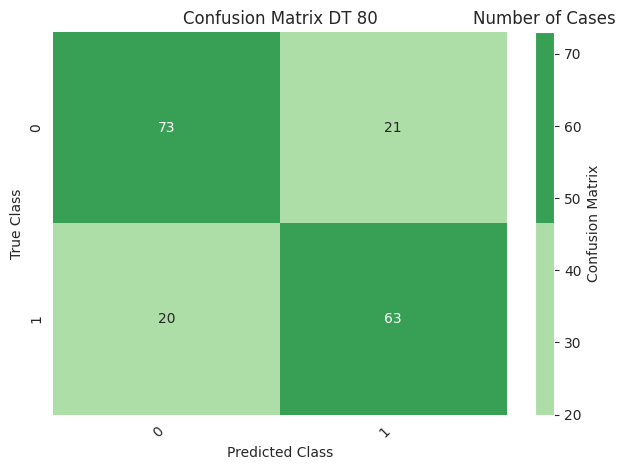

In [ ]:
print("Classification Report :",classification_report(y_test,dt_prediction))
print("Accuracy:", accuracy_score(y_test, dt_prediction))
print("Precision:",precision_score(y_test,dt_prediction))
print("Recall:",recall_score(y_test,dt_prediction))
print("F1:",f1_score(y_test,dt_prediction))
total_dt_80=(accuracy_score(y_test, dt_prediction)+precision_score(y_test,dt_prediction)+recall_score(y_test,dt_prediction)+f1_score(y_test,dt_prediction))/0.4
print("Total Value DT 80:",total_dt_80,'/10')
acc_dt_80=accuracy_score(y_test, dt_prediction)
cm = confusion_matrix(y_test, dt_prediction)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction

# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix DT 80')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Decision Tree Method (67% Data for Train : 33% Data for Testing)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [5, 10, 20,25,30],
    "min_samples_leaf": [10, 20, 50,100,120],
    "criterion": ["gini", "entropy"],
}

for max_depth in params["max_depth"]:
    for min_samples_leaf in params["min_samples_leaf"]:
        for criterion in params["criterion"]:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                criterion=criterion,
            )
            clf.fit(x_train, y_train)
            score = clf.score(x_test, y_test)
            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, criterion={criterion}, score={score}")


max_depth=5, min_samples_leaf=10, criterion=gini, score=0.8022598870056498
max_depth=5, min_samples_leaf=10, criterion=entropy, score=0.7796610169491526
max_depth=5, min_samples_leaf=20, criterion=gini, score=0.768361581920904
max_depth=5, min_samples_leaf=20, criterion=entropy, score=0.7570621468926554
max_depth=5, min_samples_leaf=50, criterion=gini, score=0.7288135593220338
max_depth=5, min_samples_leaf=50, criterion=entropy, score=0.7288135593220338
max_depth=5, min_samples_leaf=100, criterion=gini, score=0.768361581920904
max_depth=5, min_samples_leaf=100, criterion=entropy, score=0.768361581920904
max_depth=5, min_samples_leaf=120, criterion=gini, score=0.768361581920904
max_depth=5, min_samples_leaf=120, criterion=entropy, score=0.768361581920904
max_depth=10, min_samples_leaf=10, criterion=gini, score=0.7853107344632768
max_depth=10, min_samples_leaf=10, criterion=entropy, score=0.751412429378531
max_depth=10, min_samples_leaf=20, criterion=gini, score=0.768361581920904
max_dep

In [ ]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
best_mod=grid_search.fit(x_train,y_train)
dt_prediction=best_mod.predict(x_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


Classification Report :               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        94
         1.0       0.75      0.76      0.75        83

    accuracy                           0.77       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.77      0.77      0.77       177

Accuracy: 0.768361581920904
Precision: 0.75
Recall: 0.7590361445783133
F1: 0.7544910179640718
Total Value DT 67: 7.579721861158222 /10


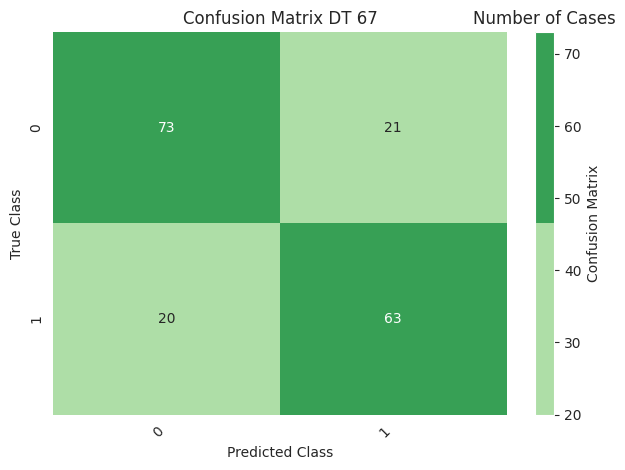

In [ ]:
print("Classification Report :",classification_report(y_test,dt_prediction))
print("Accuracy:", accuracy_score(y_test, dt_prediction))
print("Precision:",precision_score(y_test,dt_prediction))
print("Recall:",recall_score(y_test,dt_prediction))
print("F1:",f1_score(y_test,dt_prediction))
total_dt_67=(accuracy_score(y_test, dt_prediction)+precision_score(y_test,dt_prediction)+recall_score(y_test,dt_prediction)+f1_score(y_test,dt_prediction))/0.4
print("Total Value DT 67:",total_dt_67,'/10')
acc_dt_67=accuracy_score(y_test, dt_prediction)
cm = confusion_matrix(y_test, dt_prediction)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction

# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix DT 67')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Initialize KNN model
knn_model= KNeighborsClassifier()

# Define range of number of neighbors
num_neighbors = list(range(5,20))

# Define values for power parameter
p=[1,2,3]

# Define weight functions
weights = ['uniform', 'distance']

# Define distance metrics
metrics = ['euclidean', 'manhattan']

hyperparameters = dict(n_neighbors=num_neighbors, p=p,weights=weights,metric=metrics)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform grid search
grid_search = GridSearchCV(estimator=knn_model, param_grid=hyperparameters, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(x_train,y_train)
pred_diabetes = best_model.predict(x_test)

Classification Report :               precision    recall  f1-score   support

         0.0       0.84      0.76      0.79        94
         1.0       0.75      0.83      0.79        83

    accuracy                           0.79       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.80      0.79      0.79       177

Accuracy: 0.7909604519774012
Precision: 0.75
Recall: 0.8313253012048193
F1: 0.7885714285714285
Total Value KNN: 7.9021429543841215 /10


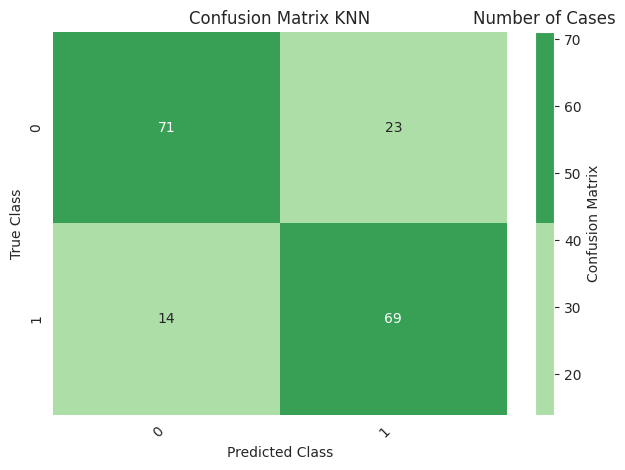

In [ ]:
print("Classification Report :",classification_report(y_test,pred_diabetes))
print("Accuracy:", accuracy_score(y_test, pred_diabetes))
print("Precision:",precision_score(y_test,pred_diabetes))
print("Recall:",recall_score(y_test,pred_diabetes))
print("F1:",f1_score(y_test,pred_diabetes))
total_knn=(accuracy_score(y_test, pred_diabetes)+precision_score(y_test,pred_diabetes)+recall_score(y_test,pred_diabetes)+f1_score(y_test,pred_diabetes))/0.4
print("Total Value KNN:",total_knn,'/10')
acc_knn=accuracy_score(y_test,pred_diabetes)
cm = confusion_matrix(y_test, pred_diabetes)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix KNN')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Random Forest 1800

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(x_train, y_train)
rf_pred_1800=best_model.predict(x_test)

Classification Report :               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        94
         1.0       0.81      0.83      0.82        83

    accuracy                           0.83       177
   macro avg       0.83      0.83      0.83       177
weighted avg       0.83      0.83      0.83       177

Accuracy: 0.8305084745762712
Precision: 0.8117647058823529
Recall: 0.8313253012048193
F1: 0.8214285714285715
Total Value Random Forest 1800: 8.237567632730038 /10


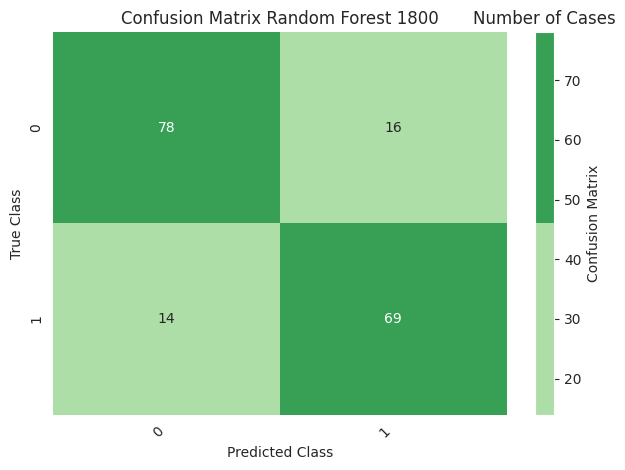

In [ ]:
print("Classification Report :",classification_report(y_test,rf_pred_1800))
print("Accuracy:", accuracy_score(y_test, rf_pred_1800))
print("Precision:",precision_score(y_test,rf_pred_1800))
print("Recall:",recall_score(y_test,rf_pred_1800))
print("F1:",f1_score(y_test,rf_pred_1800))
total_rf_1800=(accuracy_score(y_test, rf_pred_1800)+precision_score(y_test,rf_pred_1800)+recall_score(y_test,rf_pred_1800)+f1_score(y_test,rf_pred_1800))/0.4
print("Total Value Random Forest 1800:",total_rf_1800,'/10')
acc_rf_1800=accuracy_score(y_test,rf_pred_1800)
cm = confusion_matrix(y_test, rf_pred_1800)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Random Forest 1800')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Random Forest 3600

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [3600]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(x_train, y_train)
rf_pred_3600=best_model.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,rf_pred_3600))
print("Accuracy:", accuracy_score(y_test, rf_pred_3600))
print("Precision:",precision_score(y_test,rf_pred_3600))
print("Recall:",recall_score(y_test,rf_pred_3600))
print("F1:",f1_score(y_test,rf_pred_3600))
total_rf_3600=(accuracy_score(y_test, rf_pred_3600)+precision_score(y_test,rf_pred_3600)+recall_score(y_test,rf_pred_3600)+f1_score(y_test,rf_pred_3600))/0.4
print("Total Value Random Forest 3600:",total_rf_3600,'/10')
acc_rf_3600=accuracy_score(y_test,rf_pred_3600)
cm = confusion_matrix(y_test, rf_pred_3600)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Random Forest 3600')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


NameError: name 'rf_pred_3600' is not defined

##Naive Bayes

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Classification Report :               precision    recall  f1-score   support

         0.0       0.78      0.83      0.80        94
         1.0       0.79      0.73      0.76        83

    accuracy                           0.79       177
   macro avg       0.79      0.78      0.78       177
weighted avg       0.79      0.79      0.78       177

Accuracy: 0.7853107344632768
Precision: 0.7922077922077922
Recall: 0.7349397590361446
F1: 0.7625
Total Value Random Naive Bayes: 7.6873957142680345 /10


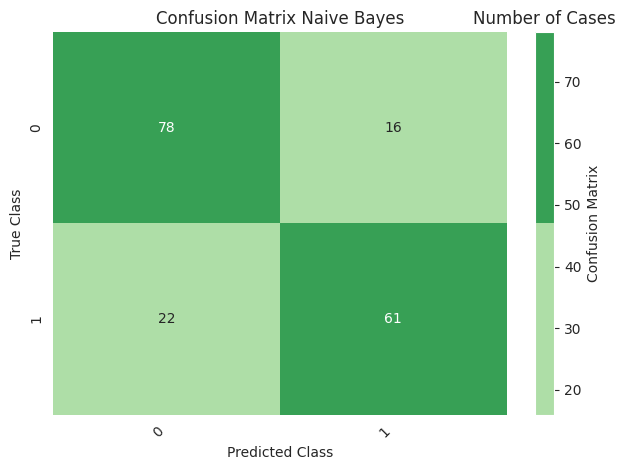

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

best_model= nbModel_grid.fit(x_train, y_train)

nb_pred=best_model.predict(x_test)

print("Classification Report :",classification_report(y_test,nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:",precision_score(y_test,nb_pred))
print("Recall:",recall_score(y_test,nb_pred))
print("F1:",f1_score(y_test,nb_pred))
total_nb=(accuracy_score(y_test, nb_pred)+precision_score(y_test,nb_pred)+recall_score(y_test,nb_pred)+f1_score(y_test,nb_pred))/0.4
print("Total Value Random Naive Bayes:",total_nb,'/10')
acc_nb=accuracy_score(y_test,nb_pred)
cm = confusion_matrix(y_test, nb_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Naive Bayes')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Sortlist Accuracy and Total Value of Data

In [ ]:
flat_data = []
for sublist in data:
    for item in sublist:  # Iterate over elements within each sublist
        flat_data.append(float(item))  # Extract and convert each item

sorted_values = np.sort(flat_data)[::-1]


In [ ]:
data_acc = [[acc_rf_1800], [acc_rf_3600], [acc_dt_67], [acc_dt_80], [acc_log], [acc_nb], [acc_knn]]
names_acc = ["acc_rf_1800", "acc_rf_3600","acc_dt_67","acc_dt_80","acc_log","acc_nb","acc_kn"]  # Replace with actual names

sorted_data = sorted(zip(names_acc, data_acc), key=lambda x: x[1][0])  # Sort by values

for name_acc, value in sorted_data:
    formatted_value = "{:.4f}".format(float(value[0]))
    print(f"{name_acc}: {formatted_value}")


acc_dt_67: 0.7684
acc_dt_80: 0.7684
acc_nb: 0.7853
acc_kn: 0.7910
acc_log: 0.8136
acc_rf_1800: 0.8305
acc_rf_3600: 0.8305


In [ ]:
data_acc=[[acc_rf_1800],[acc_rf_3600],[acc_dt_67],[acc_dt_80],[acc_log],[acc_nb],[acc_knn]]
flat_data = []
for sublist in data_acc:
    for item in sublist:
        flat_data.append(float(item))

sorted_values = np.sort(flat_data)[::-1]
print(sorted_values,data_acc[4])

[0.83050847 0.83050847 0.81355932 0.79096045 0.78531073 0.76836158
 0.76836158] [0.8135593220338984]


In [ ]:
data = [[total_lr], [total_dt_80], [total_dt_67], [total_knn], [total_rf_1800], [total_rf_3600], [total_nb]]

# Assuming each sublist contains one element
flat_data = []
for sublist in data:
    for item in sublist:
        flat_data.append(float(item))

sorted_values = np.sort(flat_data)[::-1]
print(sorted_values,data[4])


[8.2550227  8.20341381 8.12002489 7.90214295 7.68739571 7.57972186
 7.43299605] [8.120024893763917]


In [ ]:
data = [[total_lr], [total_dt_80], [total_dt_67], [total_knn], [total_rf_1800], [total_rf_3600], [total_nb]]
names = ["total_lr", "total_dt_80","total_dt_67","total_knn","total_rf_1800","total_rf_3600","total_nb"]  # Replace with actual names

sorted_data = sorted(zip(names, data), key=lambda x: x[1][0])  # Sort by values

for name, value in sorted_data:
    formatted_value = "{:.4f}".format(float(value[0]))
    print(f"{name}: {formatted_value}")


total_dt_80: 7.4330
total_dt_67: 7.5797
total_nb: 7.6874
total_knn: 7.9021
total_rf_1800: 8.1200
total_lr: 8.2034
total_rf_3600: 8.2550


##Conclusion
In conclusion, this exploration of various machine learning models for predicting diabetes yielded valuable insights. While Naive Bayes, Logistic Regression, and K-Nearest Neighbors all performed admirably, the **Decision Tree** with **1800 estimators** **achieving the highest accuracy**.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
min_max_scaler=MinMaxScaler()
x_train_scaled=min_max_scaler.fit_transform(x_train)
y_train_scaled=min_max_scaler.fit_transform(x_test)

##Neural Network Architecture Experient

* **Deep :** Deep neural networks have many hidden layers, allowing them to capture complex relationships in data. This can be beneficial for tasks requiring high accuracy, especially with large datasets.
* **Shallow :** Shallow networks have few hidden layers, making them easier to train and interpret but potentially limiting their ability to learn complex patterns.
* **Narrow :** Narrow networks have fewer neurons, making them faster to train but potentially limiting their expressiveness.
* **Wide :** Wide networks have many neurons in each hidden layer, increasing their capacity to learn intricate features. This can be helpful for large datasets but may lead to overfitting with smaller ones.



#Narrow and Shallow

In [ ]:
model_ns=Sequential()
model_ns.add(Dense(units=4,activation='relu'))
model_ns.add(Dense(units=2,activation='relu'))
model_ns.add(Dense(units=1,activation='sigmoid'))
model_ns.build(input_shape=x_train_scaled.shape)
model_ns.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (428, 4)                  36        
                                                                 
 dense_4 (Dense)             (428, 2)                  10        
                                                                 
 dense_5 (Dense)             (428, 1)                  3         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_ns.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model_ns.fit(x_train_scaled,y_train,epochs=256)

Epoch 1/256
14/14 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5421
Epoch 2/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.6215
Epoch 3/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.6682
Epoch 4/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.6495
Epoch 5/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.6285
Epoch 6/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6098
Epoch 7/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.6121
Epoch 8/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.6145
Epoch 9/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6215
Epoch 10/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6215
Epoch 11/

In [ ]:
x_train_scaled=min_max_scaler.fit_transform(x_train)
x_test_scaled=min_max_scaler.fit_transform(x_test)

In [ ]:
predict_ns=model_ns.predict(x_test_scaled)
print(f"Top-1 - Top -5\n {predict_ns[:5]} ")
print("Smallest Value:",np.max(predict_ns),"\nLargest Value:", np.min(predict_ns))

4/4 [==============================] - 0s 2ms/step
Top-1 - Top -5
 [[0.80868036]
 [0.510432  ]
 [0.80868036]
 [0.80868036]
 [0.80868036]] 
Smallest Value: 0.80868036 
Largest Value: 0.0027249088


In [ ]:
accuracy_ns = accuracy_score(y_test, np.round(predict_ns))
print(accuracy_ns)


0.7685185185185185


In [ ]:
print(classification_report(y_test,np.round(predict_ns)))

              precision    recall  f1-score   support

         0.0       0.86      0.65      0.74        55
         1.0       0.71      0.89      0.79        53

    accuracy                           0.77       108
   macro avg       0.78      0.77      0.77       108
weighted avg       0.79      0.77      0.77       108



##Narrow and Wide

In [ ]:
model_nw=Sequential()
model_nw.add(Dense(units=64,activation='relu'))
model_nw.add(Dense(units=32,activation='relu'))
model_nw.add(Dense(units=1,activation='sigmoid'))
model_nw.build(input_shape=x_train_scaled.shape)
model_nw.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (428, 64)                 576       
                                                                 
 dense_7 (Dense)             (428, 32)                 2080      
                                                                 
 dense_8 (Dense)             (428, 1)                  33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_nw.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model_nw.fit(x_train_scaled,y_train,epochs=256)

Epoch 1/256
14/14 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.5023
Epoch 2/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5140
Epoch 3/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6192
Epoch 4/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6963
Epoch 5/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6963
Epoch 6/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7173
Epoch 7/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7383
Epoch 8/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7523
Epoch 9/256
14/14 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7593
Epoch 10/256
14/14 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7617
Epoch 11/

In [ ]:
predict_nw=model_nw.predict(x_test_scaled)
print(f"Top-1 - Top -5\n {predict_nw[:5]} ")
print("Smallest Value:",np.max(predict_nw),"\nLargest Value:", np.min(predict_nw))

4/4 [==============================] - 0s 2ms/step
Top-1 - Top -5
 [[0.92706853]
 [0.07759012]
 [0.8569587 ]
 [0.98091567]
 [0.9452847 ]] 
Smallest Value: 0.999542 
Largest Value: 0.0003883822


In [ ]:
accuracy_nw = accuracy_score(y_test, np.round(predict_nw))
print(accuracy_nw)

0.7314814814814815


In [ ]:
print(classification_report(y_test,np.round(predict_nw)))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        55
         1.0       0.73      0.72      0.72        53

    accuracy                           0.73       108
   macro avg       0.73      0.73      0.73       108
weighted avg       0.73      0.73      0.73       108



##Deep and Shallow

In [ ]:
model_ds = Sequential()
model_ds.add(Dense(units=4, activation='relu'))
model_ds.add(Dense(units=4, activation='relu'))
model_ds.add(Dense(units=4, activation='relu'))
model_ds.add(Dense(units=4, activation='relu'))
model_ds.add(Dense(units=2, activation='relu'))
model_ds.add(Dense(units=2, activation='relu'))
model_ds.add(Dense(units=2, activation='relu'))
model_ds.add(Dense(units=2, activation='relu'))
model_ds.add(Dense(units=1, activation='sigmoid'))
model_ds.build(input_shape=x_train_scaled.shape)
model_ds.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (428, 4)                  36        
                                                                 
 dense_19 (Dense)            (428, 4)                  20        
                                                                 
 dense_20 (Dense)            (428, 4)                  20        
                                                                 
 dense_21 (Dense)            (428, 4)                  20        
                                                                 
 dense_22 (Dense)            (428, 2)                  10        
                                                                 
 dense_23 (Dense)            (428, 2)                  6         
                                                                 
 dense_24 (Dense)            (428, 2)                 

In [ ]:
model_ds.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_ds.fit(x_train_scaled, y_train, epochs=256)

Epoch 1/256
14/14 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 2/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 3/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 4/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 5/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 6/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 7/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 8/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 9/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 10/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 11/

In [ ]:
predict_ds = model_ds.predict(x_test_scaled)
print(f"Example outputs:\n {predict_ds[:5]}")
print("Largest value:", np.max(predict_ds), "\nSmallest value:", np.min(predict_ds))

4/4 [==============================] - 0s 5ms/step
Example outputs:
 [[0.501522]
 [0.501522]
 [0.501522]
 [0.501522]
 [0.501522]]
Largest value: 0.501522 
Smallest value: 0.501522


In [ ]:
accuracy_ds = accuracy_score(y_test, np.round(predict_ds))
print(accuracy_ds)

0.49074074074074076


In [ ]:
print(classification_report(y_test, np.round(predict_ds)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.49      1.00      0.66        53

    accuracy                           0.49       108
   macro avg       0.25      0.50      0.33       108
weighted avg       0.24      0.49      0.32       108



##Deep and Wide

In [ ]:
model_dw = Sequential()
model_dw.add(Dense(units=4, activation='relu'))
model_dw.add(Dense(units=4, activation='relu'))
model_dw.add(Dense(units=4, activation='relu'))
model_dw.add(Dense(units=4, activation='relu'))
model_dw.add(Dense(units=2, activation='relu'))
model_dw.add(Dense(units=2, activation='relu'))
model_dw.add(Dense(units=2, activation='relu'))
model_dw.add(Dense(units=2, activation='relu'))
model_dw.add(Dense(units=1, activation='sigmoid'))
model_dw.build(input_shape=x_train_scaled.shape)
model_dw.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (428, 4)                  36        
                                                                 
 dense_28 (Dense)            (428, 4)                  20        
                                                                 
 dense_29 (Dense)            (428, 4)                  20        
                                                                 
 dense_30 (Dense)            (428, 4)                  20        
                                                                 
 dense_31 (Dense)            (428, 2)                  10        
                                                                 
 dense_32 (Dense)            (428, 2)                  6         
                                                                 
 dense_33 (Dense)            (428, 2)                 

In [ ]:
predict_dw = model_dw.predict(x_test_scaled)
print(f"Example outputs:\n {predict_dw[:5]}")
print("Largest value:", np.max(predict_dw), "\nSmallest value:", np.min(predict_dw))

4/4 [==============================] - 0s 4ms/step
Example outputs:
 [[0.5041612]
 [0.5041612]
 [0.5041612]
 [0.5041612]
 [0.5041612]]
Largest value: 0.5041612 
Smallest value: 0.5041612


In [ ]:
accuracy_dw = accuracy_score(y_test, np.round(predict_dw))
print(accuracy_dw)

0.49074074074074076


In [ ]:
model_dw.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dw.fit(x_train_scaled, y_train, epochs=256)

Epoch 1/256
14/14 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4883
Epoch 2/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 3/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 4/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 5/256
14/14 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 6/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 7/256
14/14 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 8/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 9/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 10/256
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 11/

##Conclusion

In [ ]:
data_acc_ann = [[accuracy_ns], [accuracy_nw], [accuracy_dw], [accuracy_ds]]
names_acc_ann = ["acc_ns", "acc_nw","acc_dw","acc_ds"]

sorted_data = sorted(zip(names_acc_ann, data_acc_ann), key=lambda x: x[1][0])  # Sort by values

for name, value in sorted_data:
    formatted_value = "{:.4f}".format(float(value[0]))
    print(f"{name}: {formatted_value}")


acc_dw: 0.4907
acc_ds: 0.4907
acc_nw: 0.7315
acc_ns: 0.7685


The result shown that narrow and shallow neural network was the best model for this case based on the 76% accuracy result. Since the dataset is small,sticking to a shallow network also beneficial to avoid overfitting.